<a href="https://colab.research.google.com/github/Lilbrosyrus/cosc470s24/blob/main/FastNeuralNetwork_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [2]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 19.85 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [3]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [4]:
import numpy as np
print(np.shape(training_data))
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(50000, 2)
(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [5]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = 0 # replace this with the correct function call!
  whichimage = np.argmax(training_img[1])
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  # add code here that determines which average was closest to darkness
  return 0

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]


for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
print(np.shape(test_data))
print(np.shape(test_data[0]))
print(test_data[0][1])


(10000, 2)
(2,)
7


In [7]:
 # part 2 - use this default configuration and the following hyper-parameters
 #epochs - 30
 # batch size = 10
  # learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9110 / 10000
Epoch 1 : 9184 / 10000
Epoch 2 : 9338 / 10000
Epoch 3 : 9368 / 10000
Epoch 4 : 9390 / 10000
Epoch 5 : 9366 / 10000
Epoch 6 : 9437 / 10000
Epoch 7 : 9442 / 10000
Epoch 8 : 9448 / 10000
Epoch 9 : 9446 / 10000
Epoch 10 : 9455 / 10000
Epoch 11 : 9451 / 10000
Epoch 12 : 9474 / 10000
Epoch 13 : 9497 / 10000
Epoch 14 : 9483 / 10000
Epoch 15 : 9496 / 10000
Epoch 16 : 9491 / 10000
Epoch 17 : 9483 / 10000
Epoch 18 : 9478 / 10000
Epoch 19 : 9498 / 10000
Epoch 20 : 9501 / 10000
Epoch 21 : 9497 / 10000
Epoch 22 : 9489 / 10000
Epoch 23 : 9507 / 10000
Epoch 24 : 9498 / 10000
Epoch 25 : 9500 / 10000
Epoch 26 : 9530 / 10000
Epoch 27 : 9513 / 10000
Epoch 28 : 9506 / 10000
Epoch 29 : 9513 / 10000


In [8]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[9.59756714e-12]
 [9.99990182e-01]
 [7.29345198e-07]
 [4.10337789e-09]
 [8.81522205e-08]
 [1.80636619e-08]
 [1.30271741e-07]
 [4.67906767e-06]
 [7.82269566e-08]
 [3.90750048e-09]]
1
1
[963, 1118, 971, 963, 929, 823, 923, 968, 911, 944]
[963, 1118, 971, 963, 929, 823, 923, 968, 911, 944]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


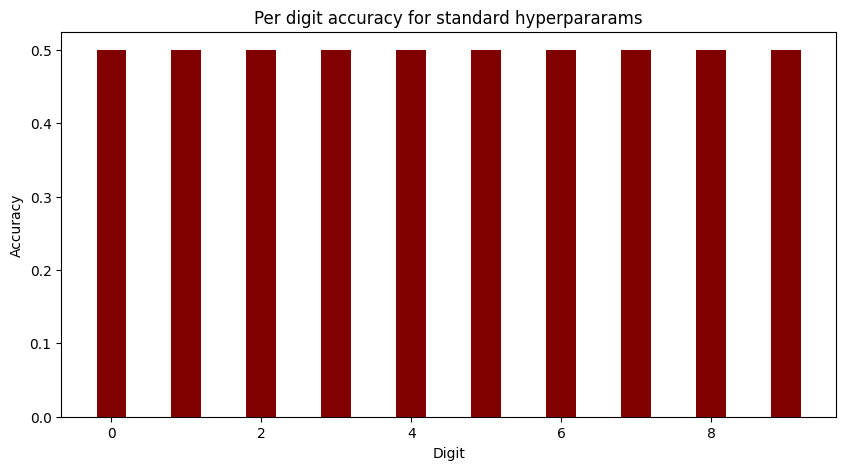

In [9]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [10]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[ 0.48730287 -0.93912712  1.80723816 ...  0.36130398  0.38093913
  -0.35312933]
 [-1.0928759  -0.07812877 -1.79740559 ...  0.82154046 -0.71037667
   0.0164443 ]
 [-1.02090251  1.17702991  0.66633962 ... -0.59616529  0.46486055
  -0.35310928]
 ...
 [-1.14020353  0.74531283  0.12572964 ... -0.6548735   1.12305969
  -0.83638724]
 [ 0.33924367  0.53592696 -0.68572437 ...  0.214662   -0.08280708
  -0.4746836 ]
 [-2.15844765 -1.63356296  1.70440495 ...  1.75446901 -0.71344874
  -0.72867326]]


In [11]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[ -1.29139711  -1.84195652  -3.43001937  -2.03030008   5.36093525
    3.27587573   2.03655303   1.13559105  -3.26751498  -0.57057863
    1.91596473  -0.72247921  -2.53472514  -4.07570148   3.38505408
   -1.38287397  -1.67071165  -2.8958389    4.83643088  -2.41081922
   -0.16869751  -3.11948202  -0.54640586  -3.04911727  -2.90477343
   -3.46896171   0.25202466  -2.29365492  -3.57449809  -2.23043716]
 [ -3.22364926  -3.04945002   1.44940437   2.39374878  -1.60348112
   -1.198855     1.23477218   3.05068629   1.19137364   5.4015639
   -3.48906076  -2.91346212   3.6572524   -0.08083854  -1.93581347
   -0.35683726  -6.95260552   6.73605933  -1.02330978   3.6696986
   -0.71678366  -1.28169495  -1.80040767  -2.04206397   0.37749231
   -4.92710524  -0.74755832  -1.4690335   -0.63266535   1.75762097]
 [ -4.01564579  -4.61597766   2.409645    -6.34920852  -3.31573409
   -1.28510698  10.68657715  -0.95477747  -0.69788844   1.05175295
   -1.52001361   0.83313963  -2.76094048   3.63062082

In [12]:
# part 3 - experiment with different hyper parameters
#epochs - 5, 15, 30, 60 (Batch size 10, learning 3.0)
#batch - 5, 10, 50, 100 (epochs 30, learning data 5.0)
#learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10)
net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data) #reabstantiating the network and running the different parameters (Which are the training data)

Epoch 0 : 9108 / 10000
Epoch 1 : 9237 / 10000
Epoch 2 : 9299 / 10000
Epoch 3 : 9283 / 10000
Epoch 4 : 9329 / 10000


In [13]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[1.41215729e-07]
 [9.99310514e-01]
 [2.97677494e-04]
 [4.28519771e-04]
 [1.14563391e-06]
 [2.63526433e-04]
 [1.43594214e-04]
 [3.02721088e-04]
 [3.70170043e-05]
 [1.12311560e-05]]
1
1
[953, 1108, 935, 944, 946, 807, 888, 960, 879, 909]
[953, 1108, 935, 944, 946, 807, 888, 960, 879, 909]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


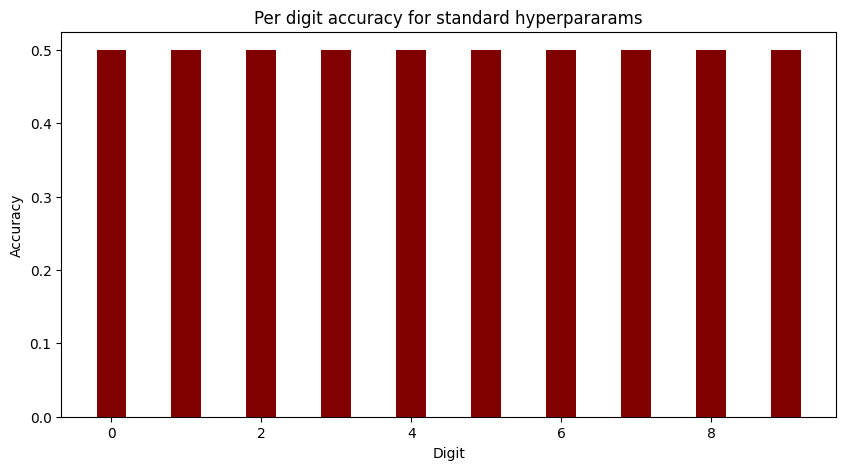

In [14]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [15]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 15, 10, 3.0, test_data=test_data)

Epoch 0 : 9028 / 10000
Epoch 1 : 9210 / 10000
Epoch 2 : 9289 / 10000
Epoch 3 : 9307 / 10000
Epoch 4 : 9328 / 10000
Epoch 5 : 9377 / 10000
Epoch 6 : 9365 / 10000
Epoch 7 : 9386 / 10000
Epoch 8 : 9398 / 10000
Epoch 9 : 9434 / 10000
Epoch 10 : 9454 / 10000
Epoch 11 : 9424 / 10000
Epoch 12 : 9425 / 10000
Epoch 13 : 9453 / 10000
Epoch 14 : 9467 / 10000


In [16]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)


[[1.81340790e-12]
 [9.99986383e-01]
 [2.23452226e-04]
 [3.28561211e-03]
 [5.16391493e-07]
 [4.46997144e-04]
 [4.88011179e-06]
 [1.43381588e-05]
 [5.99154600e-05]
 [2.68818045e-07]]
1
1
[962, 1119, 977, 970, 900, 816, 920, 983, 903, 917]
[962, 1119, 977, 970, 900, 816, 920, 983, 903, 917]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


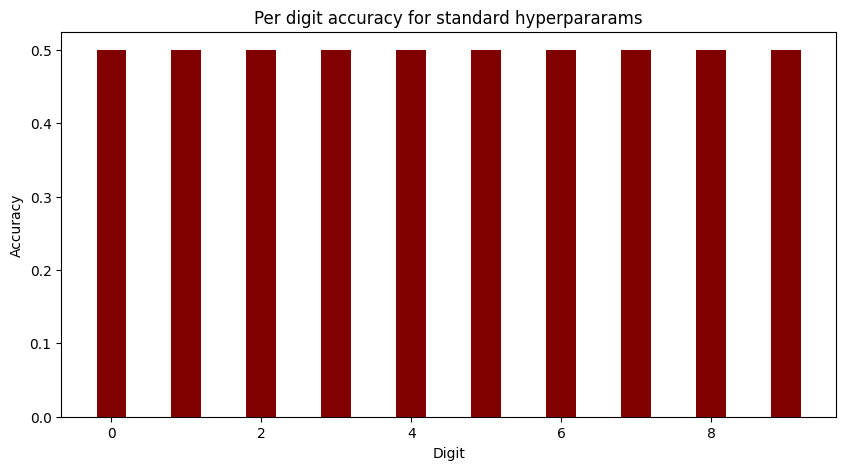

In [17]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [18]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9028 / 10000
Epoch 1 : 9231 / 10000
Epoch 2 : 9319 / 10000
Epoch 3 : 9342 / 10000
Epoch 4 : 9392 / 10000
Epoch 5 : 9414 / 10000
Epoch 6 : 9415 / 10000
Epoch 7 : 9420 / 10000
Epoch 8 : 9436 / 10000
Epoch 9 : 9421 / 10000
Epoch 10 : 9417 / 10000
Epoch 11 : 9453 / 10000
Epoch 12 : 9430 / 10000
Epoch 13 : 9447 / 10000
Epoch 14 : 9461 / 10000
Epoch 15 : 9473 / 10000
Epoch 16 : 9489 / 10000
Epoch 17 : 9487 / 10000
Epoch 18 : 9489 / 10000
Epoch 19 : 9495 / 10000
Epoch 20 : 9471 / 10000
Epoch 21 : 9487 / 10000
Epoch 22 : 9497 / 10000
Epoch 23 : 9487 / 10000
Epoch 24 : 9488 / 10000
Epoch 25 : 9496 / 10000
Epoch 26 : 9509 / 10000
Epoch 27 : 9510 / 10000
Epoch 28 : 9494 / 10000
Epoch 29 : 9502 / 10000


In [19]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[9.13336309e-11]
 [9.99941776e-01]
 [3.43069613e-07]
 [7.98001657e-08]
 [2.53462758e-09]
 [3.47899356e-04]
 [1.33691564e-06]
 [6.75357366e-06]
 [6.67800862e-07]
 [4.96076652e-08]]
1
1
[955, 1119, 983, 940, 942, 837, 924, 965, 890, 947]
[955, 1119, 983, 940, 942, 837, 924, 965, 890, 947]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


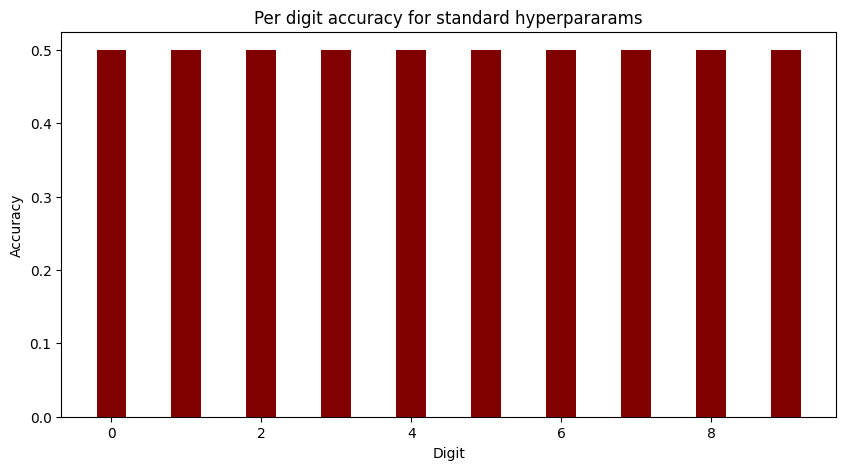

In [20]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [21]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 60, 10, 3.0, test_data=test_data)

Epoch 0 : 9074 / 10000
Epoch 1 : 9221 / 10000
Epoch 2 : 9269 / 10000
Epoch 3 : 9280 / 10000
Epoch 4 : 9368 / 10000
Epoch 5 : 9385 / 10000
Epoch 6 : 9406 / 10000
Epoch 7 : 9418 / 10000
Epoch 8 : 9428 / 10000
Epoch 9 : 9443 / 10000
Epoch 10 : 9429 / 10000
Epoch 11 : 9458 / 10000
Epoch 12 : 9480 / 10000
Epoch 13 : 9456 / 10000
Epoch 14 : 9470 / 10000
Epoch 15 : 9471 / 10000
Epoch 16 : 9478 / 10000
Epoch 17 : 9485 / 10000
Epoch 18 : 9480 / 10000
Epoch 19 : 9483 / 10000
Epoch 20 : 9479 / 10000
Epoch 21 : 9495 / 10000
Epoch 22 : 9507 / 10000
Epoch 23 : 9500 / 10000
Epoch 24 : 9480 / 10000
Epoch 25 : 9491 / 10000
Epoch 26 : 9512 / 10000
Epoch 27 : 9493 / 10000
Epoch 28 : 9509 / 10000
Epoch 29 : 9520 / 10000
Epoch 30 : 9501 / 10000
Epoch 31 : 9496 / 10000
Epoch 32 : 9475 / 10000
Epoch 33 : 9496 / 10000
Epoch 34 : 9522 / 10000
Epoch 35 : 9518 / 10000
Epoch 36 : 9504 / 10000
Epoch 37 : 9493 / 10000
Epoch 38 : 9503 / 10000
Epoch 39 : 9529 / 10000
Epoch 40 : 9488 / 10000
Epoch 41 : 9506 / 10000
Ep

In [23]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[1.79334859e-12]
 [9.99977676e-01]
 [1.41077886e-10]
 [1.03223298e-09]
 [3.18186654e-09]
 [5.66323241e-09]
 [1.37786761e-07]
 [1.58974794e-04]
 [2.56030120e-04]
 [2.22959642e-10]]
1
1
[957, 1118, 983, 952, 941, 811, 919, 979, 928, 923]
[957, 1118, 983, 952, 941, 811, 919, 979, 928, 923]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


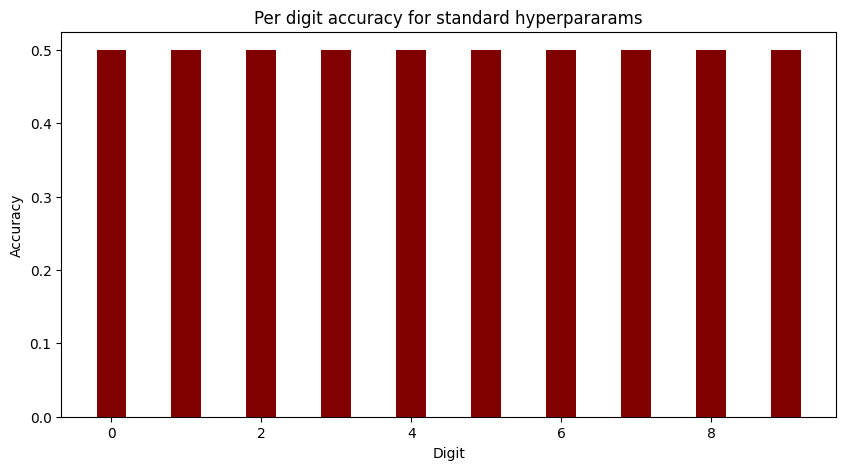

In [24]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [25]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 5, 5.0, test_data=test_data)

Epoch 0 : 9050 / 10000
Epoch 1 : 9274 / 10000
Epoch 2 : 9292 / 10000
Epoch 3 : 9339 / 10000
Epoch 4 : 9395 / 10000
Epoch 5 : 9333 / 10000
Epoch 6 : 9397 / 10000
Epoch 7 : 9390 / 10000
Epoch 8 : 9413 / 10000
Epoch 9 : 9390 / 10000
Epoch 10 : 9347 / 10000
Epoch 11 : 9439 / 10000
Epoch 12 : 9460 / 10000
Epoch 13 : 9412 / 10000
Epoch 14 : 9372 / 10000
Epoch 15 : 9463 / 10000
Epoch 16 : 9445 / 10000
Epoch 17 : 9448 / 10000
Epoch 18 : 9445 / 10000
Epoch 19 : 9442 / 10000
Epoch 20 : 9474 / 10000
Epoch 21 : 9474 / 10000
Epoch 22 : 9459 / 10000
Epoch 23 : 9453 / 10000
Epoch 24 : 9432 / 10000
Epoch 25 : 9500 / 10000
Epoch 26 : 9474 / 10000
Epoch 27 : 9478 / 10000
Epoch 28 : 9473 / 10000
Epoch 29 : 9482 / 10000


In [26]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[1.68331419e-13]
 [9.99997230e-01]
 [3.95278706e-07]
 [2.97766182e-12]
 [1.26330407e-09]
 [1.39715061e-13]
 [6.85299016e-07]
 [2.65294175e-03]
 [7.37374127e-08]
 [7.49610055e-14]]
1
1
[961, 1114, 972, 947, 916, 829, 915, 954, 927, 947]
[961, 1114, 972, 947, 916, 829, 915, 954, 927, 947]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


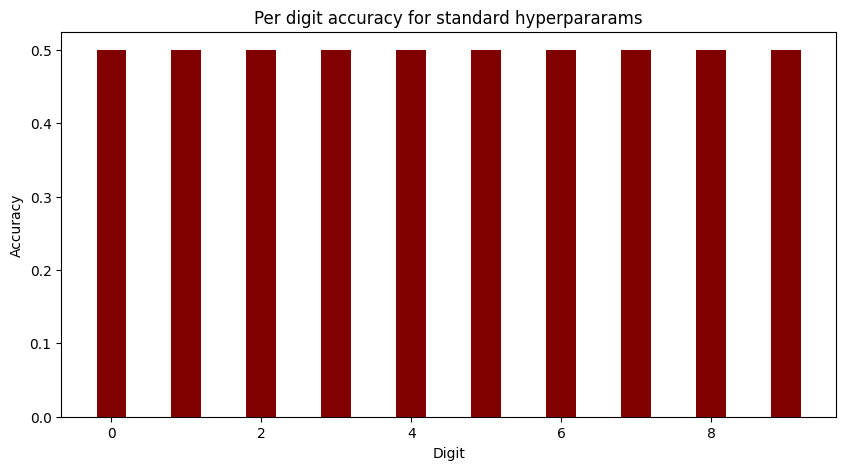

In [27]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [28]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 5.0, test_data=test_data)

Epoch 0 : 8270 / 10000
Epoch 1 : 9188 / 10000
Epoch 2 : 9335 / 10000
Epoch 3 : 9329 / 10000
Epoch 4 : 9372 / 10000
Epoch 5 : 9382 / 10000
Epoch 6 : 9423 / 10000
Epoch 7 : 9430 / 10000
Epoch 8 : 9381 / 10000
Epoch 9 : 9418 / 10000
Epoch 10 : 9427 / 10000
Epoch 11 : 9453 / 10000
Epoch 12 : 9451 / 10000
Epoch 13 : 9462 / 10000
Epoch 14 : 9457 / 10000
Epoch 15 : 9481 / 10000
Epoch 16 : 9456 / 10000
Epoch 17 : 9456 / 10000
Epoch 18 : 9484 / 10000
Epoch 19 : 9460 / 10000
Epoch 20 : 9465 / 10000
Epoch 21 : 9462 / 10000
Epoch 22 : 9479 / 10000
Epoch 23 : 9457 / 10000
Epoch 24 : 9485 / 10000
Epoch 25 : 9475 / 10000
Epoch 26 : 9463 / 10000
Epoch 27 : 9471 / 10000
Epoch 28 : 9503 / 10000
Epoch 29 : 9491 / 10000


In [29]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[2.71767499e-17]
 [9.99885171e-01]
 [2.40448686e-05]
 [8.40085291e-04]
 [5.51074521e-10]
 [1.45294903e-05]
 [7.34048033e-06]
 [1.49235718e-08]
 [3.35885080e-06]
 [1.89312558e-13]]
1
1
[958, 1118, 955, 942, 947, 847, 897, 975, 921, 931]
[958, 1118, 955, 942, 947, 847, 897, 975, 921, 931]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


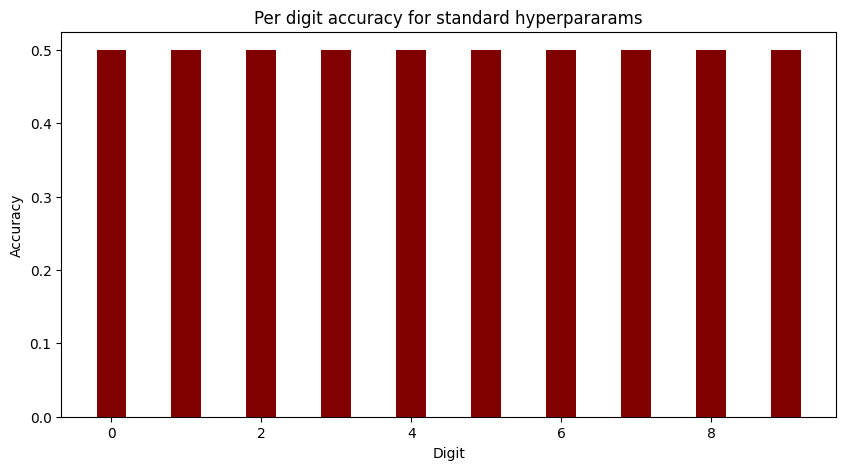

In [30]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [31]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 50, 5.0, test_data=test_data)

Epoch 0 : 8756 / 10000
Epoch 1 : 9054 / 10000
Epoch 2 : 9160 / 10000
Epoch 3 : 9251 / 10000
Epoch 4 : 9272 / 10000
Epoch 5 : 9324 / 10000
Epoch 6 : 9329 / 10000
Epoch 7 : 9378 / 10000
Epoch 8 : 9375 / 10000
Epoch 9 : 9387 / 10000
Epoch 10 : 9418 / 10000
Epoch 11 : 9408 / 10000
Epoch 12 : 9418 / 10000
Epoch 13 : 9422 / 10000
Epoch 14 : 9434 / 10000
Epoch 15 : 9431 / 10000
Epoch 16 : 9454 / 10000
Epoch 17 : 9436 / 10000
Epoch 18 : 9450 / 10000
Epoch 19 : 9463 / 10000
Epoch 20 : 9469 / 10000
Epoch 21 : 9433 / 10000
Epoch 22 : 9477 / 10000
Epoch 23 : 9474 / 10000
Epoch 24 : 9471 / 10000
Epoch 25 : 9454 / 10000
Epoch 26 : 9488 / 10000
Epoch 27 : 9487 / 10000
Epoch 28 : 9478 / 10000
Epoch 29 : 9479 / 10000


In [32]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[2.17068107e-11]
 [9.99751818e-01]
 [2.23202955e-04]
 [2.87180909e-05]
 [1.01738675e-06]
 [9.11523862e-05]
 [1.72556679e-06]
 [1.21080018e-04]
 [1.98463817e-05]
 [3.75721578e-08]]
1
1
[961, 1118, 954, 955, 945, 822, 918, 970, 900, 936]
[961, 1118, 954, 955, 945, 822, 918, 970, 900, 936]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


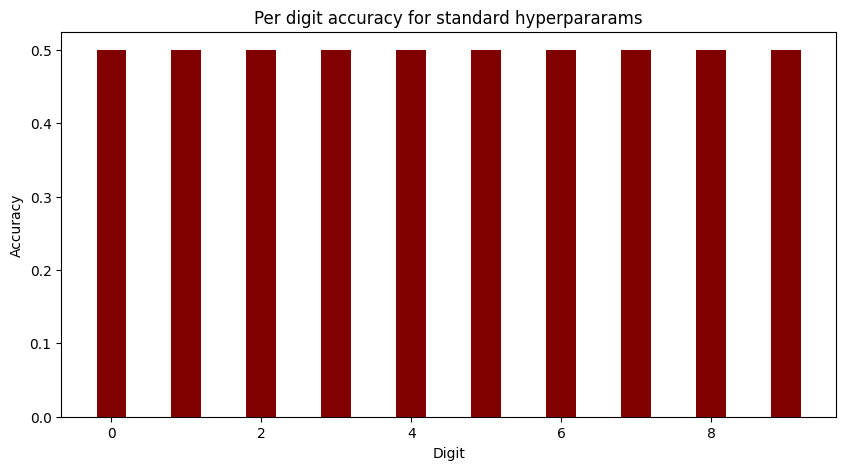

In [33]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [34]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 100, 5.0, test_data=test_data)

Epoch 0 : 8332 / 10000
Epoch 1 : 8800 / 10000
Epoch 2 : 8948 / 10000
Epoch 3 : 9057 / 10000
Epoch 4 : 9126 / 10000
Epoch 5 : 9156 / 10000
Epoch 6 : 9199 / 10000
Epoch 7 : 9225 / 10000
Epoch 8 : 9223 / 10000
Epoch 9 : 9264 / 10000
Epoch 10 : 9252 / 10000
Epoch 11 : 9277 / 10000
Epoch 12 : 9296 / 10000
Epoch 13 : 9307 / 10000
Epoch 14 : 9326 / 10000
Epoch 15 : 9337 / 10000
Epoch 16 : 9347 / 10000
Epoch 17 : 9362 / 10000
Epoch 18 : 9360 / 10000
Epoch 19 : 9360 / 10000
Epoch 20 : 9367 / 10000
Epoch 21 : 9363 / 10000
Epoch 22 : 9370 / 10000
Epoch 23 : 9374 / 10000
Epoch 24 : 9386 / 10000
Epoch 25 : 9393 / 10000
Epoch 26 : 9385 / 10000
Epoch 27 : 9420 / 10000
Epoch 28 : 9414 / 10000
Epoch 29 : 9411 / 10000


In [35]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[7.04818797e-08]
 [9.69800292e-01]
 [5.55530691e-04]
 [9.66244737e-04]
 [5.03814469e-08]
 [3.82045735e-05]
 [9.58295908e-04]
 [4.75450324e-04]
 [1.62910432e-02]
 [1.37120007e-04]]
1
1
[957, 1119, 958, 928, 917, 812, 917, 966, 900, 937]
[957, 1119, 958, 928, 917, 812, 917, 966, 900, 937]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


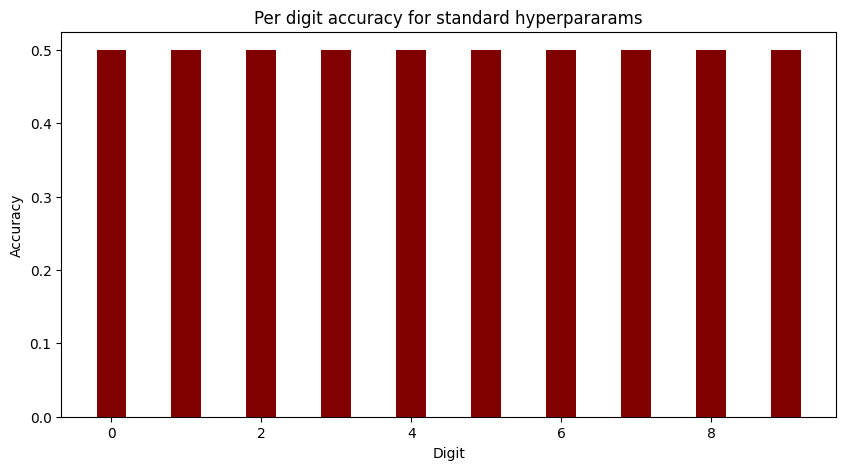

In [36]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [37]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 1.0, test_data=test_data)

Epoch 0 : 7346 / 10000
Epoch 1 : 8925 / 10000
Epoch 2 : 9112 / 10000
Epoch 3 : 9173 / 10000
Epoch 4 : 9208 / 10000
Epoch 5 : 9237 / 10000
Epoch 6 : 9279 / 10000
Epoch 7 : 9314 / 10000
Epoch 8 : 9309 / 10000
Epoch 9 : 9331 / 10000
Epoch 10 : 9332 / 10000
Epoch 11 : 9344 / 10000
Epoch 12 : 9366 / 10000
Epoch 13 : 9365 / 10000
Epoch 14 : 9378 / 10000
Epoch 15 : 9385 / 10000
Epoch 16 : 9387 / 10000
Epoch 17 : 9388 / 10000
Epoch 18 : 9404 / 10000
Epoch 19 : 9406 / 10000
Epoch 20 : 9377 / 10000
Epoch 21 : 9404 / 10000
Epoch 22 : 9387 / 10000
Epoch 23 : 9388 / 10000
Epoch 24 : 9415 / 10000
Epoch 25 : 9401 / 10000
Epoch 26 : 9398 / 10000
Epoch 27 : 9427 / 10000
Epoch 28 : 9425 / 10000
Epoch 29 : 9409 / 10000


In [38]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[7.65056209e-08]
 [9.85717620e-01]
 [8.30261049e-05]
 [1.29744920e-04]
 [4.14053551e-05]
 [1.04355403e-03]
 [5.47410010e-07]
 [3.41893577e-05]
 [1.63087875e-04]
 [8.51445221e-06]]
1
1
[952, 1110, 959, 950, 929, 811, 920, 968, 894, 916]
[952, 1110, 959, 950, 929, 811, 920, 968, 894, 916]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


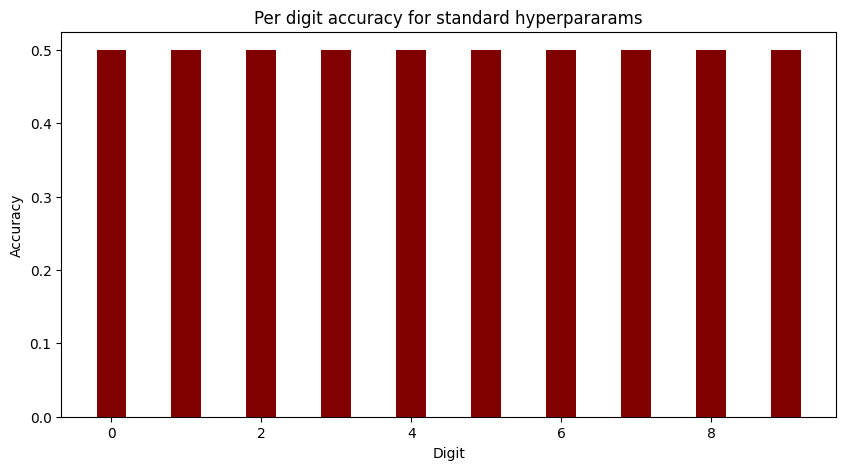

In [39]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [40]:









net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9092 / 10000
Epoch 1 : 9184 / 10000
Epoch 2 : 9245 / 10000
Epoch 3 : 9275 / 10000
Epoch 4 : 9334 / 10000
Epoch 5 : 9346 / 10000
Epoch 6 : 9368 / 10000
Epoch 7 : 9375 / 10000
Epoch 8 : 9373 / 10000
Epoch 9 : 9406 / 10000
Epoch 10 : 9388 / 10000
Epoch 11 : 9437 / 10000
Epoch 12 : 9426 / 10000
Epoch 13 : 9419 / 10000
Epoch 14 : 9440 / 10000
Epoch 15 : 9466 / 10000
Epoch 16 : 9431 / 10000
Epoch 17 : 9466 / 10000
Epoch 18 : 9466 / 10000
Epoch 19 : 9448 / 10000
Epoch 20 : 9447 / 10000
Epoch 21 : 9463 / 10000
Epoch 22 : 9475 / 10000
Epoch 23 : 9463 / 10000
Epoch 24 : 9471 / 10000
Epoch 25 : 9472 / 10000
Epoch 26 : 9452 / 10000
Epoch 27 : 9455 / 10000
Epoch 28 : 9460 / 10000
Epoch 29 : 9484 / 10000


In [41]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[8.51258618e-09]
 [9.99983465e-01]
 [3.35641661e-08]
 [7.34182279e-05]
 [3.29643039e-09]
 [3.40919700e-03]
 [1.37775263e-06]
 [3.26265763e-06]
 [1.83965143e-06]
 [3.06700831e-07]]
1
1
[965, 1120, 967, 946, 929, 827, 920, 971, 896, 943]
[965, 1120, 967, 946, 929, 827, 920, 971, 896, 943]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


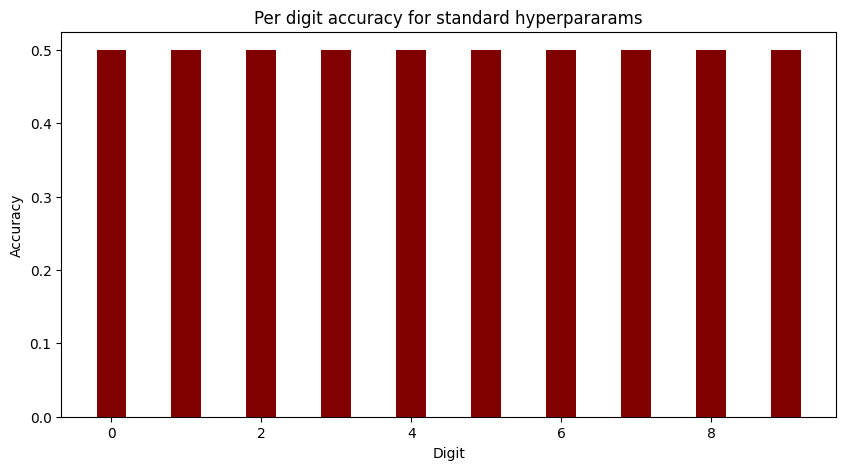

In [42]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()

In [45]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 5.0, test_data=test_data)

Epoch 0 : 9081 / 10000
Epoch 1 : 9255 / 10000
Epoch 2 : 9338 / 10000
Epoch 3 : 9361 / 10000
Epoch 4 : 9361 / 10000
Epoch 5 : 9391 / 10000
Epoch 6 : 9352 / 10000
Epoch 7 : 9440 / 10000
Epoch 8 : 9444 / 10000
Epoch 9 : 9468 / 10000
Epoch 10 : 9468 / 10000
Epoch 11 : 9439 / 10000
Epoch 12 : 9473 / 10000
Epoch 13 : 9389 / 10000
Epoch 14 : 9467 / 10000
Epoch 15 : 9463 / 10000
Epoch 16 : 9470 / 10000
Epoch 17 : 9485 / 10000
Epoch 18 : 9507 / 10000
Epoch 19 : 9504 / 10000
Epoch 20 : 9469 / 10000
Epoch 21 : 9495 / 10000
Epoch 22 : 9482 / 10000
Epoch 23 : 9441 / 10000
Epoch 24 : 9498 / 10000
Epoch 25 : 9492 / 10000
Epoch 26 : 9515 / 10000
Epoch 27 : 9483 / 10000
Epoch 28 : 9491 / 10000
Epoch 29 : 9491 / 10000


In [43]:
a = net.feedforward(list(test_data)[2][0])
print(a)
print(np.argmax(a))
print(list(test_data)[2][1])

#per digit accuracies
#loop through the test data again
#calculate how many of each digit was classified correctly
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x,y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
    digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/(correct_counts[i]+digit_counts[i]) for i in range(10)]
print(accuracies)

[[8.51258618e-09]
 [9.99983465e-01]
 [3.35641661e-08]
 [7.34182279e-05]
 [3.29643039e-09]
 [3.40919700e-03]
 [1.37775263e-06]
 [3.26265763e-06]
 [1.83965143e-06]
 [3.06700831e-07]]
1
1
[965, 1120, 967, 946, 929, 827, 920, 971, 896, 943]
[965, 1120, 967, 946, 929, 827, 920, 971, 896, 943]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


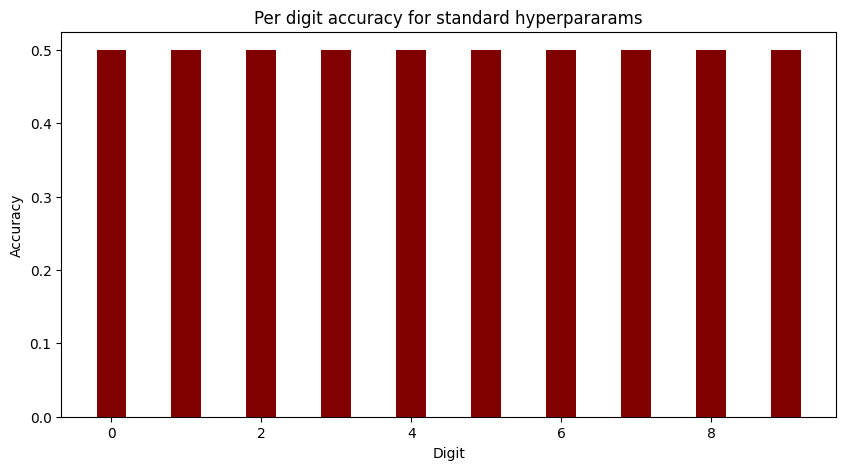

In [44]:
import matplotlib.pyplot as plt #matrix plotting library is what matplotlib represent
fig = plt.figure(figsize = (10, 5))
 #creating the bar plot
plt.bar(range(0,10), accuracies, color = 'maroon', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperpararams")
plt.show()